# Agrupamento Hierárquico

* É criada uma estrutura em formato de árvore que indica o número de clusters
* Abordagem aglomerativa: cada registro pertence ao seu próprio cluster e pares de clusters são unidos
* Os resultados podem ser apresentados em um dendrograma

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

## Credit Card

In [2]:
df_credit = pd.read_csv('../data/credit_card_clients.csv', header= 1)
df_credit

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
df_bill = df_credit.copy()

In [4]:
df_bill['BILL TOTAL'] = df_credit['BILL_AMT1'] + df_credit['BILL_AMT2'] + df_credit['BILL_AMT3'] + df_credit['BILL_AMT4'] + df_credit['BILL_AMT5'] + df_credit['BILL_AMT6']
df_bill   

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL TOTAL
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,7704
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,17077
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,101653
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,231334
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,109339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,31237,15980,8500,20000,5003,3047,5000,1000,0,725349
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,5190,0,1837,3526,8998,129,0,0,0,21182
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20582,19357,0,0,22000,4200,2000,3100,1,70496
29998,29999,80000,1,3,1,41,1,-1,0,0,...,11855,48944,85900,3409,1178,1926,52964,1804,1,266611


In [5]:
X_credit = df_bill.iloc[:, [1, 25]].values
X_credit

array([[ 20000,   7704],
       [120000,  17077],
       [ 90000, 101653],
       ...,
       [ 30000,  70496],
       [ 80000, 266611],
       [ 50000, 230874]], dtype=int64)

In [6]:
scaler_credit = StandardScaler()
X_credit_s = scaler_credit.fit_transform(X_credit)
X_credit_s

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [7]:
#dendro = dendrogram(linkage(X_credit_s, method='ward'))

In [8]:
#hc_credit = AgglomerativeClustering(n_clusters= 3, affinity='euclidean', linkage='ward')
#label = hc_credit.fit_predict(X_credit_s)
#label

In [9]:
#sns.set(rc = {'figure.figsize': (15,7)})
#sns.scatterplot(x= X_credit_s[:,0], y= X_credit_s[:,1], hue= label)

## Salary and Age

In [10]:
df_salary = np.array([[20, 1000],[27,1200],[21,2900],[37,1850],[46,900],[53,950],
                       [55,2000],[47,2100],[52,3000],[32,5900],[39,4100],[41,5100],
                       [39,7000],[48,5000],[48,6500]])

In [11]:
scaler_salary = StandardScaler()
df_salary_s = scaler_salary.fit_transform(df_salary)
df_salary_s

array([[-1.87963884, -1.11413572],
       [-1.23255006, -1.01725435],
       [-1.78719758, -0.19376273],
       [-0.30813751, -0.70238991],
       [ 0.52383377, -1.1625764 ],
       [ 1.17092255, -1.13835606],
       [ 1.35580506, -0.62972888],
       [ 0.61627503, -0.5812882 ],
       [ 1.0784813 , -0.14532205],
       [-0.77034379,  1.25945777],
       [-0.12325501,  0.38752547],
       [ 0.0616275 ,  0.8719323 ],
       [-0.12325501,  1.79230528],
       [ 0.70871628,  0.82349162],
       [ 0.70871628,  1.55010187]])

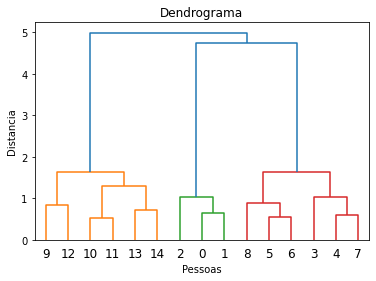

In [12]:
dendrograma = dendrogram(linkage(df_salary_s, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Pessoas')
plt.ylabel('Distancia');

In [13]:
hc_salary = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')
label = hc_salary.fit_predict(df_salary_s)

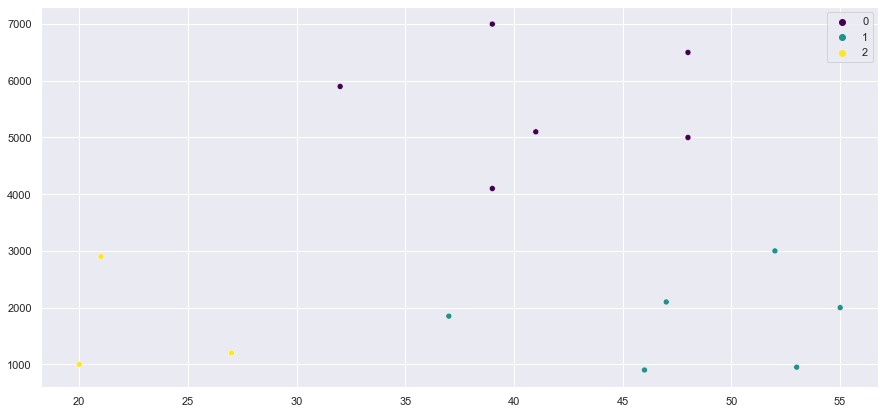

In [14]:
sns.set(rc = {'figure.figsize': (15,7)})
sns.scatterplot(x= df_salary[:,0], y= df_salary[:,1], hue= label, palette= 'viridis');